In [1]:
path="train_mushroom.csv"

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve



In [3]:
df=pd.read_csv(path)

- Tiền xử lý dữ liệu

Loại bỏ missing data

In [4]:
df.dropna(axis=0,how="any")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,2,0,1,0,...,3,7,7,0,2,1,5,0,3,4
1,0,2,3,9,0,0,2,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,0,3,8,0,1,2,0,0,1,...,3,7,7,0,2,1,5,1,2,2
3,1,2,2,8,0,7,2,0,1,1,...,3,7,7,0,2,1,5,0,3,4
4,0,2,3,3,1,6,2,1,0,0,...,3,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,5,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,5,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,5,2,1,1
8122,1,4,2,0,1,3,2,0,1,2,...,2,7,7,0,2,1,1,7,4,1


In [5]:
df.dropna(axis=1,how="any")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,2,0,1,0,...,3,7,7,0,2,1,5,0,3,4
1,0,2,3,9,0,0,2,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,0,3,8,0,1,2,0,0,1,...,3,7,7,0,2,1,5,1,2,2
3,1,2,2,8,0,7,2,0,1,1,...,3,7,7,0,2,1,5,0,3,4
4,0,2,3,3,1,6,2,1,0,0,...,3,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,5,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,5,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,5,2,1,1
8122,1,4,2,0,1,3,2,0,1,2,...,2,7,7,0,2,1,1,7,4,1


Thay thế các missing bằng giá trị liền trước

In [6]:
df.fillna(method="pad")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,2,0,1,0,...,3,7,7,0,2,1,5,0,3,4
1,0,2,3,9,0,0,2,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,0,3,8,0,1,2,0,0,1,...,3,7,7,0,2,1,5,1,2,2
3,1,2,2,8,0,7,2,0,1,1,...,3,7,7,0,2,1,5,0,3,4
4,0,2,3,3,1,6,2,1,0,0,...,3,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,5,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,5,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,5,2,1,1
8122,1,4,2,0,1,3,2,0,1,2,...,2,7,7,0,2,1,1,7,4,1


In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,2,0,1,0,...,3,7,7,0,2,1,5,0,3,4
1,0,2,3,9,0,0,2,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,0,3,8,0,1,2,0,0,1,...,3,7,7,0,2,1,5,1,2,2
3,1,2,2,8,0,7,2,0,1,1,...,3,7,7,0,2,1,5,0,3,4
4,0,2,3,3,1,6,2,1,0,0,...,3,7,7,0,2,1,1,1,0,0


Biểu đồ Histogram - Đây là một đại diện đồ họa của một phân bố tần suất của một số dữ liệu số. Hình chữ nhật có kích thước bằng nhau theo hướng ngang có chiều cao tương ứng với tần suất.
 - Biểu diễn đồ họa về sự phân bố tần số của dữ liệu

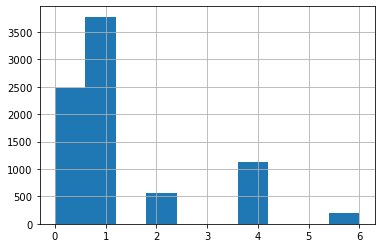

In [8]:
df["stalk-root"].hist();
# e: cân bằng
# c: hình chùy
# b: hình củ
# r: dây rễ
# ? : missing

In [9]:
# e=equal    1120 
# c=club     556
# b=bulbous  3776
# r=rooted   192
# ?= missing  2480

In [10]:
# import matplotlib.pyplot as plt

# fig,axes = plt.subplots(4,2,figsize=(12,15))
# for idx,cat_col in enumerate(df["stalk-root"]):
#     row,col = idx//2,idx%2
#     sns.countplot(x=cat_col,data=df["stalk-root"],ax=axes[row,col])


# plt.subplots_adjust(hspace=1)

In [11]:
df["stalk-root"].unique()
#Trả về numpy.array để chỉ rõ index nào đã được lấy

array([4, 2, 1, 6, 0], dtype=int64)

In [12]:
df["stalk-shape"].value_counts()
# t: thon lại
# e: to ra

1    4608
0    3516
Name: stalk-shape, dtype: int64

In [13]:
# print("stalk-root bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?")
df['gill-size'].value_counts()

0    5612
1    2512
Name: gill-size, dtype: int64

In [14]:
df["stalk-shape"].value_counts()

1    4608
0    3516
Name: stalk-shape, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [16]:
df.describe()
# freq: tần suất - frequently

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,2.491876,1.742984,4.323486,0.584441,4.788282,1.948301,0.161497,0.309207,4.729444,...,2.424914,5.446578,5.393402,0.0,1.965534,1.069424,3.291974,3.062038,3.644018,3.221073
std,0.499708,0.901287,1.179629,3.444391,0.492848,1.983678,0.317391,0.368011,0.462195,3.342402,...,0.870347,2.143900,2.194604,0.0,0.242669,0.271064,1.801672,2.825308,1.252082,2.530692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,2.000000,...,2.000000,5.000000,5.000000,0.0,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000
50%,0.000000,2.000000,2.000000,3.000000,1.000000,6.000000,2.000000,0.000000,0.000000,4.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000
75%,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,0.000000,1.000000,7.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,5.000000,7.000000,4.000000,6.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,2.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,5.000000,8.000000,5.000000,6.000000


In [17]:
df.shape

(8124, 23)

In [18]:
df["class"].unique()

array([1, 0], dtype=int64)

In [19]:
df["class"].value_counts()

0    4208
1    3916
Name: class, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


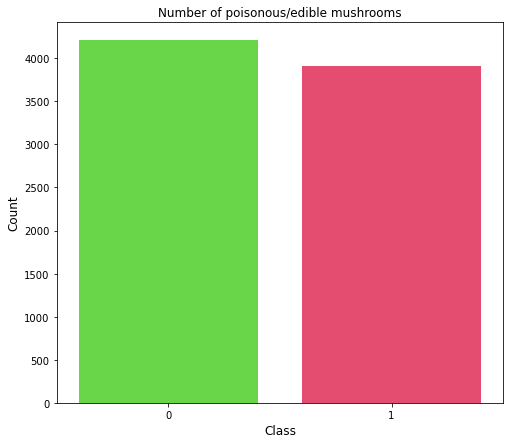

In [20]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
# sns.barplot - biểu đồ phân loại trong Seaborn
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

<AxesSubplot:>

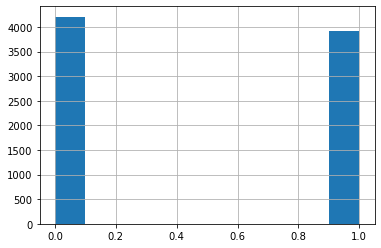

In [21]:
df['class'].hist()
# Biểu đồ Histogram

In [22]:
df['gill-size'].value_counts()

0    5612
1    2512
Name: gill-size, dtype: int64

In [23]:
# Mã hóa các cột phân loại
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [24]:
df["stalk-shape"].value_counts()

1    4608
0    3516
Name: stalk-shape, dtype: int64

In [25]:
df['gill-size'].value_counts()

0    5612
1    2512
Name: gill-size, dtype: int64

In [26]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


In [27]:
df["stalk-root"].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

Subplots - Tạo tất cả các ô con của chúng cùng một lúc và nó trả về hình và các trục (số nhiều trục) của các ô con dưới dạng một bộ tuple. Một figure có thể được hiểu là một bức tranh vẽ nơi ta vẽ bản phác thảo của mình.

Violinplot - Nó cho thấy sự phân bố của dữ liệu định lượng qua một số cấp độ của một (hoặc nhiều) biến phân loại để có thể so sánh những phân phối đó. Không giống như một biểu đồ box, trong đó tất cả các thành phần của biểu đồ tương ứng với các điểm dữ liệu thực tế, biểu đồ violin có tính năng ước tính mật độ nhân của phân phối cơ bản.

Nhìn vào biểu đồ trên ta thấy mật độ nhân tập trung tại nơi phình to ra và giảm dần ở hai đầu. Giá trị đó thể hiển qua trục y và trực quan ta có thể biết rằng giá trị cao nhất tập trung tại điểm nào, và mật độ phân loại thường tập trung ở giá trị nào…

Ta có thể thêm tham số hue vào để vẽ ra biểu đồ ta cần, tham số paletet hiển thị màu sắc của biểu đồ

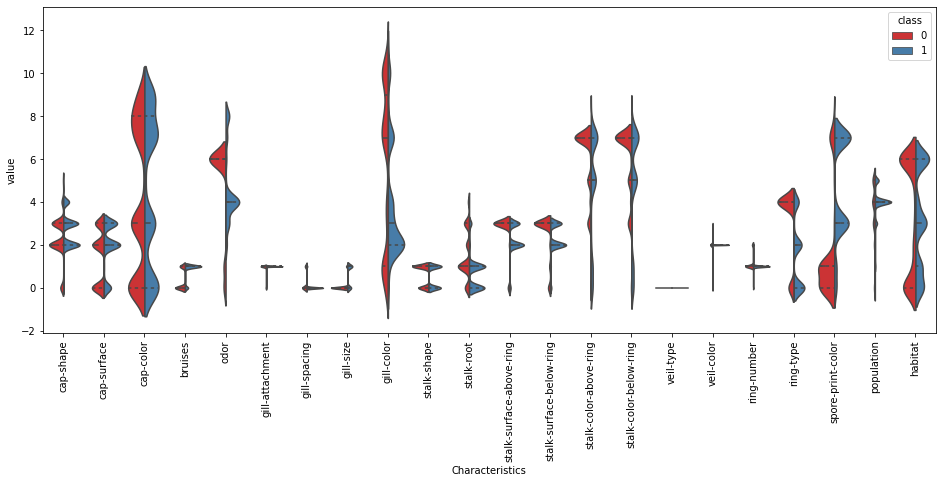

In [28]:
#Thuộc tính
df_div = pd.melt(df, "class", var_name= "Characteristics")  
#figure - khung chứa các thành phần của hình vẽ, axes - nơi các hình được vẽ lên, vẽ biểu đồ duy nhất, biểu đồ kích thước tiêu chuẩn
#subplots đưa về một bộ giá trị có 2 phần tử e và p
fig, ax = plt.subplots(figsize=(16,6))
#violinplot - cây vĩ cầm
p = sns.violinplot(ax = ax,
                   x="Characteristics",
                   y="value",
                   hue="class",
                   split = True,
                   data=df_div,
                   inner = "quartile",
                   palette = "Set1")

df_no_class = df.drop(["class"],axis = 1)

p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
# plt.savefig('violinplot.png', format='png', dpi=500, bbox_inches='tight')



Heatmap là biểu đồ sử dụng cường độ màu sắc để thể hiện độ lớn của giá trị. Khi đó các giá trị lớn sẽ được làm nổi bật bằng các vùng màu có cường độ ánh sáng mạnh và các giá trị nhỏ hơn sẽ được thể hiện bằng các mảng màu nhạt hơn.

Màu nóng - nơi xảy ra nhiều tương tác >< Màu lạnh - ít tương tác

Ma trận tương quan (Correlation matrix)
- Cũng giống với ma trận hiệp phương sai, ma trận tương quan là một bảng thể hiện hệ số tương quan giữa các biến khi ta có nhiều hơn 2 biến trong bộ dữ liệu. Mỗi ô trong bảng hiển thị mối tương quan giữa hai biến.

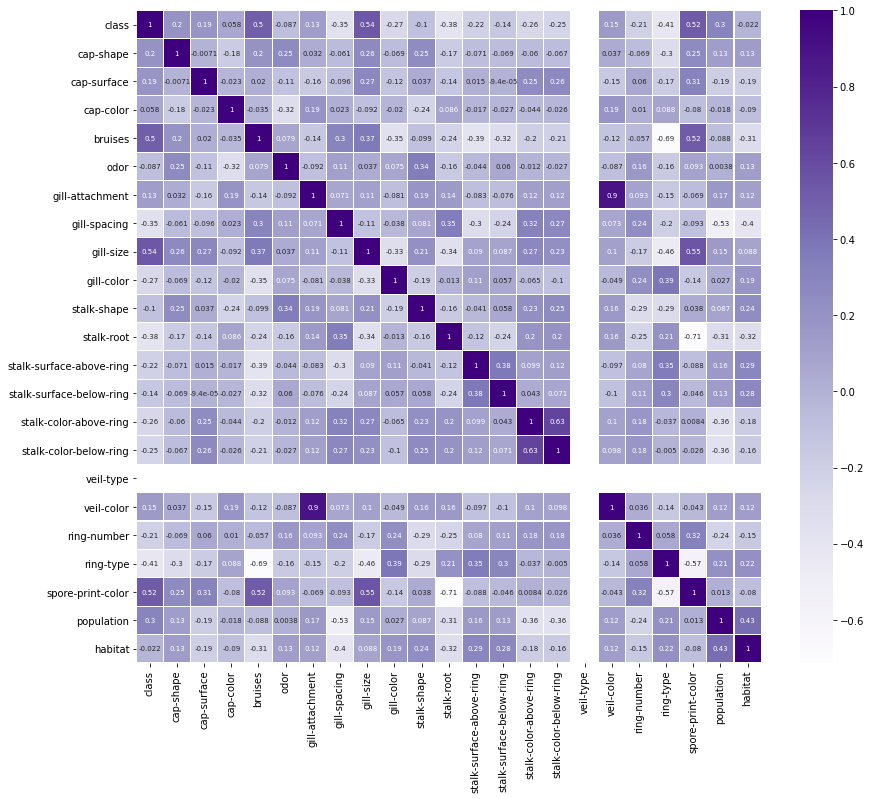

In [29]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", linecolor = "white", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

In [30]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)
#Trung bình, mức độ phân chia 

,gill-color,class
2,2,1.000000
5,5,1.000000
3,3,0.721311
4,4,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
0,0,0.156863
1,1,0.106870
8,8,0.097561


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


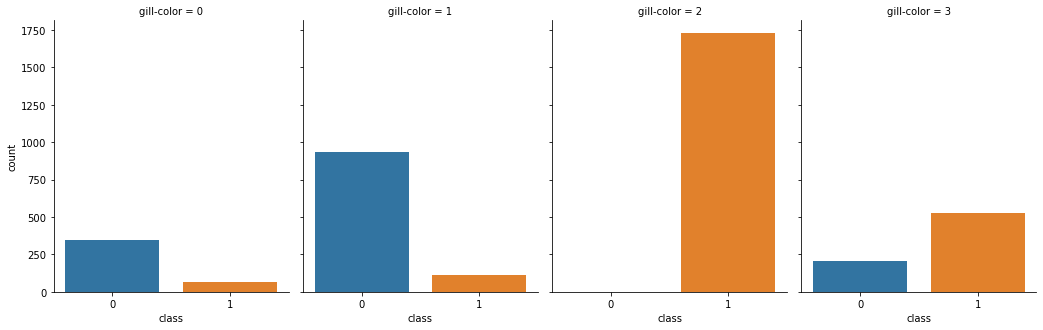

In [31]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class',
               col='gill-color',
               data=new_var, 
               kind='count',
               size=4.5,
               aspect=.8, 
               col_wrap=4);
#plt.savefig("gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


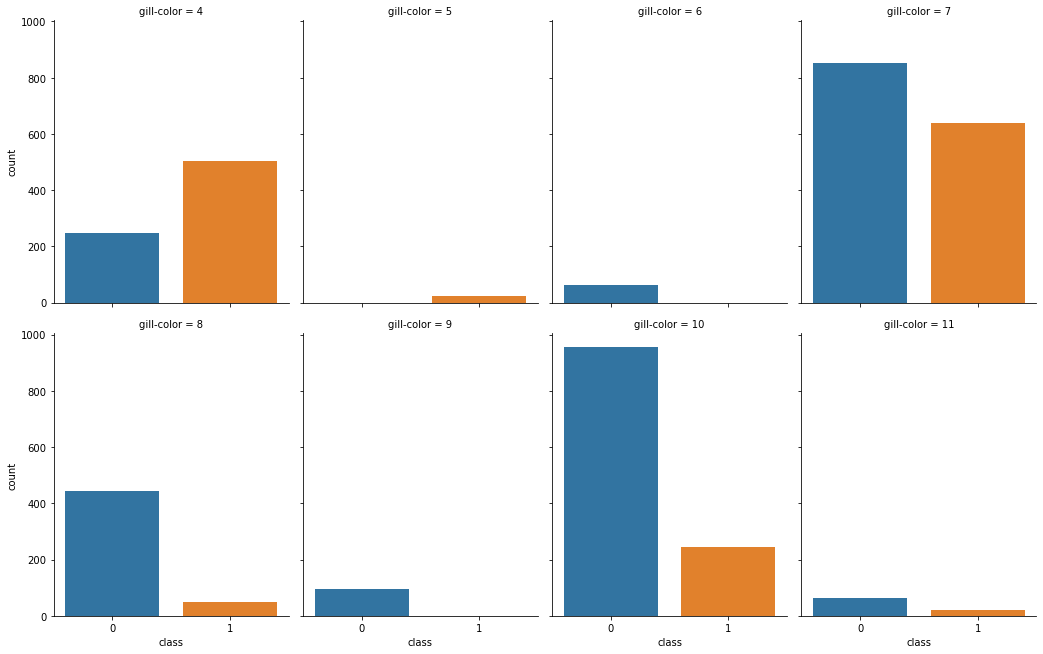

In [32]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);#plt.savefig("gillcolor2.png", format='png', dpi=400, bbox_inches='tight')

Chuẩn bị dữ liệu

In [33]:
df["stalk-root"].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

In [34]:
# e=equal    1120 
# c=club     556
# b=bulbous  3776 
# r=rooted   192
# ?= missing  2480

# 3=equal
# 2=club
# 1=bulbous
# 4=rooted
# 0= missing

In [35]:
#Tách lấy dữ liệu tập train và test
train_finish=df[1:6500]
train_finish

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0
5,0,2,2,9,0,0,1,0,0,1,...,3,7,7,0,2,1,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,1,3,2,0,1,3,1,0,1,2,...,3,7,5,0,2,1,0,7,4,6
6496,1,3,3,7,1,3,1,0,1,2,...,2,7,5,0,2,1,0,7,4,6
6497,1,3,3,7,1,4,1,0,1,2,...,2,7,5,0,2,1,0,7,4,6
6498,1,3,2,0,1,8,1,0,1,2,...,2,5,5,0,2,1,0,7,4,6


In [36]:
test=df[6500:]
test_finish=test.drop("class",axis=1)
test_finish

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6500,3,3,0,1,4,1,0,1,2,1,...,3,5,5,0,2,1,0,7,4,6
6501,4,2,7,1,8,1,0,1,2,1,...,3,5,5,0,2,1,0,7,4,6
6502,3,2,7,1,4,1,0,1,2,1,...,2,7,7,0,2,1,0,7,4,6
6503,3,3,7,1,4,1,0,1,2,1,...,2,7,5,0,2,1,0,7,4,6
6504,3,2,7,1,3,1,0,1,2,1,...,3,7,5,0,2,1,0,7,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,0,1,6,0,0,0,11,0,...,3,4,4,0,1,1,4,2,1,1
8120,2,3,0,1,6,0,0,0,11,0,...,3,4,4,0,0,1,4,2,4,1
8121,3,3,0,1,6,0,0,0,1,0,...,3,4,4,0,1,1,4,2,1,1
8122,4,2,0,1,3,1,0,1,2,1,...,2,7,7,0,2,1,0,7,4,1


In [37]:
#Tách dữ liệu ra thành các thuộc tính input (X_Train) | thuộc tính outcome (Y_train)
X_train = train_finish.drop("class", axis=1)
Y_train = train_finish["class"]
#Tách dữ liệu để lấy các thuộc tính input (X_Test)
X_test = test_finish
Y_test = test["class"]
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6500,3,3,0,1,4,1,0,1,2,1,...,3,5,5,0,2,1,0,7,4,6
6501,4,2,7,1,8,1,0,1,2,1,...,3,5,5,0,2,1,0,7,4,6
6502,3,2,7,1,4,1,0,1,2,1,...,2,7,7,0,2,1,0,7,4,6
6503,3,3,7,1,4,1,0,1,2,1,...,2,7,5,0,2,1,0,7,4,6
6504,3,2,7,1,3,1,0,1,2,1,...,3,7,5,0,2,1,0,7,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,0,1,6,0,0,0,11,0,...,3,4,4,0,1,1,4,2,1,1
8120,2,3,0,1,6,0,0,0,11,0,...,3,4,4,0,0,1,4,2,4,1
8121,3,3,0,1,6,0,0,0,1,0,...,3,4,4,0,1,1,4,2,1,1
8122,4,2,0,1,3,1,0,1,2,1,...,2,7,7,0,2,1,0,7,4,1


In [38]:
print("Thông tin tập X_train: ", X_train.shape)
print("Thông tin tập Y_train: ", Y_train.shape)
print("Thông tin tập X_test: ", X_test.shape)
#print(type(X_train))

Thông tin tập X_train:  (6499, 22)
Thông tin tập Y_train:  (6499,)
Thông tin tập X_test:  (1624, 22)


In [39]:
print(X_train[:10])
print('-'*40)
print(Y_train[:10])

    cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
1           2            3          9        0     0                1   
2           0            3          8        0     1                1   
3           2            2          8        0     7                1   
4           2            3          3        1     6                1   
5           2            2          9        0     0                1   
6           0            3          8        0     0                1   
7           0            2          8        0     1                1   
8           2            2          8        0     7                1   
9           0            3          9        0     0                1   
10          2            2          9        0     1                1   

    gill-spacing  gill-size  gill-color  stalk-shape  ...  \
1              0          0           0            0  ...   
2              0          0           1            0  ...   
3            

Phương pháp phân loại

==================1. Cây quyết định================================

In [40]:
# 1. Phân loại cây quyết định
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

Dự đoán và ước tính kết quả

Macro-average precision là trung bình cộng của các precision theo class.

Weighted-avg - Trung bình cộng có trọng số, hay số bình quân gia quyền, của một tập là giá trị trung bình cộng có phản ánh tầm quan trọng của các phần tử trong tập đó. Mỗi một giá trị quan sát sẽ được gắn một trọng số

In [41]:
#Thực hiện dự đoán kết quả trên tập dữ liệu Test:
y_pred_dt = dt.predict(X_test)
y_pred_dt


array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [42]:
#Đánh giá độ chính xác của mô hình trên kết quả vừa dự đoán và kết quả của tập test:
acc1 = accuracy_score(Y_test, y_pred_dt)
print("Báo cáo phân loại cây quyết định: \n\n", classification_report(Y_test, y_pred_dt))
print("Kiểm tra độ chính xác: ",round(acc1*100,2),"%")

Báo cáo phân loại cây quyết định: 

               precision    recall  f1-score   support

           0       1.00      0.91      0.95       507
           1       0.96      1.00      0.98      1117

    accuracy                           0.97      1624
   macro avg       0.98      0.95      0.97      1624
weighted avg       0.97      0.97      0.97      1624

Kiểm tra độ chính xác:  97.11 %


**Ma trận hỗn loạn/nhầm lẫn cho bộ phân loại cây quyết định**

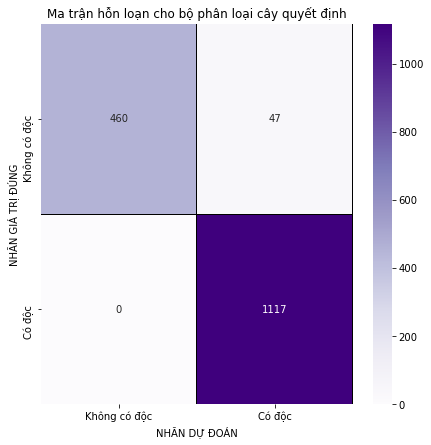

In [43]:
cm = confusion_matrix(Y_test, y_pred_dt)

x_axis_labels = ["Không có độc", "Có độc"]
y_axis_labels = ["Không có độc", "Có độc"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("NHÃN DỰ ĐOÁN")
plt.ylabel("NHÃN GIÁ TRỊ ĐÚNG")
plt.title('Ma trận hỗn loạn cho bộ phân loại cây quyết định')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

===================================2. Phân loại hồi quy Logistic=======================================

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [45]:
#Thực hiện dự đoán kết quả trên tập dữ liệu Test:
y_pred_lr = lr.predict(X_test)
y_pred_lr


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Báo cáo phân loại của Phân loại hồi quy Logistic

In [46]:
#Đánh giá độ chính xác của mô hình trên kết quả vừa dự đoán và kết quả của tập test:
acc2 = accuracy_score(Y_test, y_pred_lr)
print("Báo cáo phân loại cây quyết định: \n\n", classification_report(Y_test, y_pred_lr))
print("Kiểm tra độ chính xác: ",round(acc2*100,2),"%")

Báo cáo phân loại cây quyết định: 

               precision    recall  f1-score   support

           0       1.00      0.09      0.17       507
           1       0.71      1.00      0.83      1117

    accuracy                           0.72      1624
   macro avg       0.85      0.55      0.50      1624
weighted avg       0.80      0.72      0.62      1624

Kiểm tra độ chính xác:  71.61 %


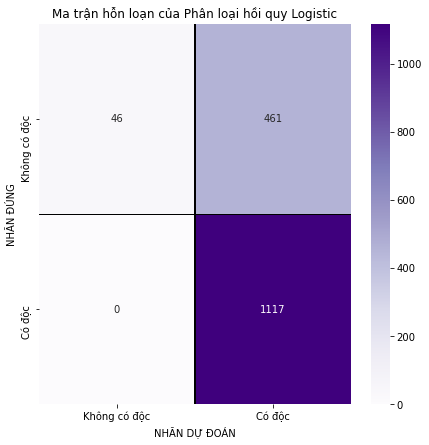

In [47]:
# Ma trận nhầm lẫn cho bộ phân loại hồi quy Logistic

cm = confusion_matrix(Y_test, y_pred_lr)
x_axis_labels = ["Không có độc", "Có độc"]
y_axis_labels = ["Không có độc", "Có độc"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("NHÃN DỰ ĐOÁN")
plt.ylabel("NHÃN ĐÚNG")
plt.title('Ma trận hỗn loạn của Phân loại hồi quy Logistic')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

3. Phân loại KNN

In [48]:
# Gọi package sklearn
from sklearn.neighbors import KNeighborsClassifier
# Khởi tạo biến knn sử dụng thuật toán phân lớp KNN, với n = 3 (láng giềng gần nhất)
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


Báo cáo phân loại của Phân loại KNN

In [49]:
#Huấn luyện mô hình với tập dữ liệu train:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [50]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

[1 1 1 ... 0 1 1]


In [51]:
#Đánh giá độ chính xác của mô hình trên kết quả vừa dự đoán và kết quả của tập test:
acc3 = accuracy_score(Y_test, y_pred_knn)
print("Báo cáo phân loại cây quyết định: \n\n", classification_report(Y_test, y_pred_knn))
print("Kiểm tra độ chính xác: ",round(acc3*100,2),"%")

Báo cáo phân loại cây quyết định: 

               precision    recall  f1-score   support

           0       1.00      0.80      0.89       507
           1       0.92      1.00      0.96      1117

    accuracy                           0.94      1624
   macro avg       0.96      0.90      0.92      1624
weighted avg       0.94      0.94      0.94      1624

Kiểm tra độ chính xác:  93.78 %


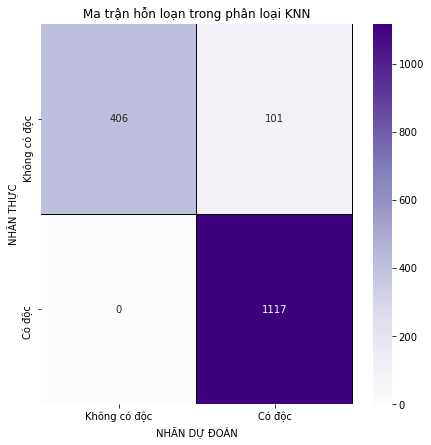

In [52]:
# Ma trận nhầm lẫn cho Phân loại KNN

cm = confusion_matrix(Y_test, y_pred_knn)
x_axis_labels = ["Không có độc", "Có độc"]
y_axis_labels = ["Không có độc", "Có độc"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("NHÃN DỰ ĐOÁN")
plt.ylabel("NHÃN THỰC")
plt.title('Ma trận hỗn loạn trong phân loại KNN')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [53]:
top = round(max(acc1,acc2,acc3)*100,2)
print("Độ chính xác cao nhất trên 3 mô hình thuật toán trên là: ",top,"%")

Độ chính xác cao nhất trên 3 mô hình thuật toán trên là:  97.11 %


=======================Xuất tập dự đoán có độ chính xác cao nhất ra file kết_quả.csv===================================

In [152]:
X_test.reset_index(drop=True, inplace=True)
Y_PRED = pd.DataFrame(y_pred_dt,columns = ["Kết quả"])
df = pd.concat([X_test,Y_PRED],axis=1)
print(df)

df.to_csv('kết_quả.csv')

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             3            3          0        1     4                1   
1             4            2          7        1     8                1   
2             3            2          7        1     4                1   
3             3            3          7        1     4                1   
4             3            2          7        1     3                1   
...         ...          ...        ...      ...   ...              ...   
1619          4            3          0        1     6                0   
1620          2            3          0        1     6                0   
1621          3            3          0        1     6                0   
1622          4            2          0        1     3                1   
1623          2            3          0        1     6                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1       